    #Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Problem Statement

Customer details along with thier credit card payment details is provided from April 2005 to September 2005. Objective is to analyse and seek insights on factors that lead to credible or not credible customers.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.19.2
1.1.3
0.11.0


### Describe the Data

In [3]:
# Read the dataset
credit = pd.read_csv('credit_card.csv')

In [4]:
## Size of the dataset
credit.shape

(30000, 25)

In [5]:
# Information about features
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  int64  
 2   GENDER     30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        29990 non-null  float64
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  int64  
 13  BILL_AMT2  30000 non-null  int64  
 14  BILL_AMT3  30000 non-null  int64  
 15  BILL_AMT4  30000 non-null  int64  
 16  BILL_AMT5  30000 non-null  int64  
 17  BILL_AMT6  30000 non-null  int64  
 18  PAY_AMT1   30000 non-null  int64  
 19  PAY_AMT2   30000 non-null  int64  
 20  PAY_AM

In [6]:
credit.describe(include="all").T

count           mean            std       min       25%  \
ID         30000.0   15000.500000    8660.398374       1.0   7500.75   
LIMIT_BAL  30000.0  167484.322667  129747.661567   10000.0  50000.00   
GENDER     30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION  30000.0       1.853133       0.790349       0.0      1.00   
MARRIAGE   30000.0       1.551867       0.521970       0.0      1.00   
AGE        29990.0      35.487062       9.236845     -20.0     28.00   
PAY_1      30000.0      -0.016700       1.123802      -2.0     -1.00   
PAY_2      30000.0      -0.133767       1.197186      -2.0     -1.00   
PAY_3      30000.0      -0.166200       1.196868      -2.0     -1.00   
PAY_4      30000.0      -0.220667       1.169139      -2.0     -1.00   
PAY_5      30000.0      -0.266200       1.133187      -2.0     -1.00   
PAY_6      30000.0      -0.291100       1.149988      -2.0     -1.00   
BILL_AMT1  30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT2  30000.0   49179.075167   71173.768783  -69777.0   2984.75   
BILL_AMT3  30000.0   47013.154800   69349.387427 -157264.0   2666.25   
BILL_AMT4  30000.0   43262.948967   64332.856134 -170000.0   2326.75   
BILL_AMT5  30000.0   40311.400967   60797.155770  -81334.0   1763.00   
BILL_AMT6  30000.0   38871.760400   59554.107537 -339603.0   1256.00   
PAY_AMT1   30000.0    5663.580500   16563.280354       0.0   1000.00   
PAY_AMT2   30000.0    5921.163500   23040.870402       0.0    833.00   
PAY_AMT3   30000.0    5225.681500   17606.961470       0.0    390.00   
PAY_AMT4   30000.0    4826.076867   15666.159744       0.0    296.00   
PAY_AMT5   30000.0    4799.387633   15278.305679       0.0    252.50   
PAY_AMT6   30000.0    5215.502567   17777.465775       0.0    117.75   
DEFAULT    30000.0       0.221200       0.415062       0.0      0.00   

                50%        75%        max  
ID          15000.5   22500.25    30000.0  
LIMIT_BAL  140000.0  240000.00  1000000.0  
GENDER          2.0       2.00        2.0  
EDUCATION       2.0       2.00        6.0  
MARRIAGE        2.0       2.00        3.0  
AGE            34.0      41.00      120.0  
PAY_1           0.0       0.00        8.0  
PAY_2           0.0       0.00        8.0  
PAY_3           0.0       0.00        8.0  
PAY_4           0.0       0.00        8.0  
PAY_5           0.0       0.00        8.0  
PAY_6           0.0       0.00        8.0  
BILL_AMT1   22381.5   67091.00   964511.0  
BILL_AMT2   21200.0   64006.25   983931.0  
BILL_AMT3   20088.5   60164.75  1664089.0  
BILL_AMT4   19052.0   54506.00   891586.0  
BILL_AMT5   18104.5   50190.50   927171.0  
BILL_AMT6   17071.0   49198.25   961664.0  
PAY_AMT1     2100.0    5006.00   873552.0  
PAY_AMT2     2009.0    5000.00  1684259.0  
PAY_AMT3     1800.0    4505.00   896040.0  
PAY_AMT4     1500.0    4013.25   621000.0  
PAY_AMT5     1500.0    4031.50   426529.0  
PAY_AMT6     1500.0    4000.00   528666.0  
DEFAULT         0.0       0.00        1.0

In [7]:
# Are there any duplicates?
dups = credit.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
credit[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [ID, LIMIT_BAL, GENDER, EDUCATION, MARRIAGE, AGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, DEFAULT]
Index: []

[0 rows x 25 columns]

##### Observations:

- Dataset has 25 columns and 30,000 rows
- The entire dataset is of integer data type. However, we understand Gender, Education, Marriage, Pay_’X’  columns and Default      are categorical in nature
- The dataset provided is for a 6-month bill cycle period
- Column names for PAY_X, BILL_AMTX, PAY_AMTX will be more meaningful if associated with their respective months
- The target column is already in 1-0 number format, with respect to whether a customer will default or not
- No duplicate records
- At an overview, Age feature has null values
- Age has a minimum value as -20 and maximum value as 120. This has to cleaned.
- Minimum values of Bill Amount fields have negative values. This seems to be valid if customers have done some advance payments

### Data Pre-processing

In [8]:
# Renaming the column names with their corresponding month
credit.columns = ['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 
                  'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR',
                 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
                 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
                 'DEFAULT']

In [9]:
credit.head()

ID  LIMIT_BAL  GENDER  EDUCATION  MARRIAGE   AGE  PAY_SEP  PAY_AUG  \
0   1      20000       2          2         1  24.0        2        2   
1   2     120000       2          2         2  26.0       -1        2   
2   3      90000       2          2         2  34.0        0        0   
3   4      50000       2          2         1  37.0        0        0   
4   5      50000       1          2         1  57.0       -1        0   

   PAY_JUL  PAY_JUN  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0       -1       -1  ...             0             0             0   
1        0        0  ...          3272          3455          3261   
2        0        0  ...         14331         14948         15549   
3        0        0  ...         28314         28959         29547   
4       -1        0  ...         20940         19146         19131   

   PAY_AMT_SEP  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0            0          689            0            0            0   
1            0         1000         1000         1000            0   
2         1518         1500         1000         1000         1000   
3         2000         2019         1200         1100         1069   
4         2000        36681        10000         9000          689   

   PAY_AMT_APR  DEFAULT  
0            0        1  
1         2000        1  
2         5000        0  
3         1000        0  
4          679        0  

[5 rows x 25 columns]

In [10]:
credit.describe().T

count           mean            std       min       25%  \
ID            30000.0   15000.500000    8660.398374       1.0   7500.75   
LIMIT_BAL     30000.0  167484.322667  129747.661567   10000.0  50000.00   
GENDER        30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION     30000.0       1.853133       0.790349       0.0      1.00   
MARRIAGE      30000.0       1.551867       0.521970       0.0      1.00   
AGE           29990.0      35.487062       9.236845     -20.0     28.00   
PAY_SEP       30000.0      -0.016700       1.123802      -2.0     -1.00   
PAY_AUG       30000.0      -0.133767       1.197186      -2.0     -1.00   
PAY_JUL       30000.0      -0.166200       1.196868      -2.0     -1.00   
PAY_JUN       30000.0      -0.220667       1.169139      -2.0     -1.00   
PAY_MAY       30000.0      -0.266200       1.133187      -2.0     -1.00   
PAY_APR       30000.0      -0.291100       1.149988      -2.0     -1.00   
BILL_AMT_SEP  30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT_AUG  30000.0   49179.075167   71173.768783  -69777.0   2984.75   
BILL_AMT_JUL  30000.0   47013.154800   69349.387427 -157264.0   2666.25   
BILL_AMT_JUN  30000.0   43262.948967   64332.856134 -170000.0   2326.75   
BILL_AMT_MAY  30000.0   40311.400967   60797.155770  -81334.0   1763.00   
BILL_AMT_APR  30000.0   38871.760400   59554.107537 -339603.0   1256.00   
PAY_AMT_SEP   30000.0    5663.580500   16563.280354       0.0   1000.00   
PAY_AMT_AUG   30000.0    5921.163500   23040.870402       0.0    833.00   
PAY_AMT_JUL   30000.0    5225.681500   17606.961470       0.0    390.00   
PAY_AMT_JUN   30000.0    4826.076867   15666.159744       0.0    296.00   
PAY_AMT_MAY   30000.0    4799.387633   15278.305679       0.0    252.50   
PAY_AMT_APR   30000.0    5215.502567   17777.465775       0.0    117.75   
DEFAULT       30000.0       0.221200       0.415062       0.0      0.00   

                   50%        75%        max  
ID             15000.5   22500.25    30000.0  
LIMIT_BAL     140000.0  240000.00  1000000.0  
GENDER             2.0       2.00        2.0  
EDUCATION          2.0       2.00        6.0  
MARRIAGE           2.0       2.00        3.0  
AGE               34.0      41.00      120.0  
PAY_SEP            0.0       0.00        8.0  
PAY_AUG            0.0       0.00        8.0  
PAY_JUL            0.0       0.00        8.0  
PAY_JUN            0.0       0.00        8.0  
PAY_MAY            0.0       0.00        8.0  
PAY_APR            0.0       0.00        8.0  
BILL_AMT_SEP   22381.5   67091.00   964511.0  
BILL_AMT_AUG   21200.0   64006.25   983931.0  
BILL_AMT_JUL   20088.5   60164.75  1664089.0  
BILL_AMT_JUN   19052.0   54506.00   891586.0  
BILL_AMT_MAY   18104.5   50190.50   927171.0  
BILL_AMT_APR   17071.0   49198.25   961664.0  
PAY_AMT_SEP     2100.0    5006.00   873552.0  
PAY_AMT_AUG     2009.0    5000.00  1684259.0  
PAY_AMT_JUL     1800.0    4505.00   896040.0  
PAY_AMT_JUN     1500.0    4013.25   621000.0  
PAY_AMT_MAY     1500.0    4031.50   426529.0  
PAY_AMT_APR     1500.0    4000.00   528666.0  
DEFAULT            0.0       0.00        1.0

In [11]:
## Converting the categorical columns in to object datatype
credit['GENDER']= credit['GENDER'].astype(object)
credit['EDUCATION']= credit['EDUCATION'].astype(object)
credit['MARRIAGE']= credit['MARRIAGE'].astype(object)
credit['PAY_SEP']= credit['PAY_SEP'].astype(object)
credit['PAY_AUG']= credit['PAY_AUG'].astype(object)
credit['PAY_JUL']= credit['PAY_JUL'].astype(object)
credit['PAY_JUN']= credit['PAY_JUN'].astype(object)
credit['PAY_MAY']= credit['PAY_MAY'].astype(object)
credit['PAY_APR']= credit['PAY_APR'].astype(object)
credit['DEFAULT']= credit['DEFAULT'].astype(object)

In [12]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            30000 non-null  int64  
 1   LIMIT_BAL     30000 non-null  int64  
 2   GENDER        30000 non-null  object 
 3   EDUCATION     30000 non-null  object 
 4   MARRIAGE      30000 non-null  object 
 5   AGE           29990 non-null  float64
 6   PAY_SEP       30000 non-null  object 
 7   PAY_AUG       30000 non-null  object 
 8   PAY_JUL       30000 non-null  object 
 9   PAY_JUN       30000 non-null  object 
 10  PAY_MAY       30000 non-null  object 
 11  PAY_APR       30000 non-null  object 
 12  BILL_AMT_SEP  30000 non-null  int64  
 13  BILL_AMT_AUG  30000 non-null  int64  
 14  BILL_AMT_JUL  30000 non-null  int64  
 15  BILL_AMT_JUN  30000 non-null  int64  
 16  BILL_AMT_MAY  30000 non-null  int64  
 17  BILL_AMT_APR  30000 non-null  int64  
 18  PAY_AMT_SEP   30000 non-nu

#### Check and Treat Bad & Missing Data

Numeric Features

In [13]:
# Check bad data in Age field
credit[credit.AGE < 18]

ID  LIMIT_BAL GENDER EDUCATION MARRIAGE   AGE PAY_SEP PAY_AUG PAY_JUL  \
409  410     280000      1         1        2 -20.0       0       0       0   

    PAY_JUN  ... BILL_AMT_JUN BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEP  \
409       0  ...       182672       168399        167983        10000   

     PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  DEFAULT  
409         8000         6371         6217         5947         6288        0  

[1 rows x 25 columns]

In [14]:
credit[credit.AGE > 80]

ID  LIMIT_BAL GENDER EDUCATION MARRIAGE    AGE PAY_SEP PAY_AUG PAY_JUL  \
430  431      90000      2         2        2  120.0       0       0       0   

    PAY_JUN  ... BILL_AMT_JUN BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEP  \
430       0  ...        74424        76070         77648         3200   

     PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  DEFAULT  
430         3300         3000         3001         3000         3100        0  

[1 rows x 25 columns]

As we have observed missing values as well in the Age field, let us decide on same treatment for both bad data and missing data in Age field.

For now let us replace the bad data in Age field as NAN

In [15]:
credit.AGE.replace(to_replace=-20, value=np.NaN, inplace= True)
credit.AGE.replace(to_replace=120, value=np.NaN, inplace= True)

In [16]:
credit.AGE.describe()

count    29988.000000
mean        35.486094
std          9.218684
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

<AxesSubplot:xlabel='AGE'>

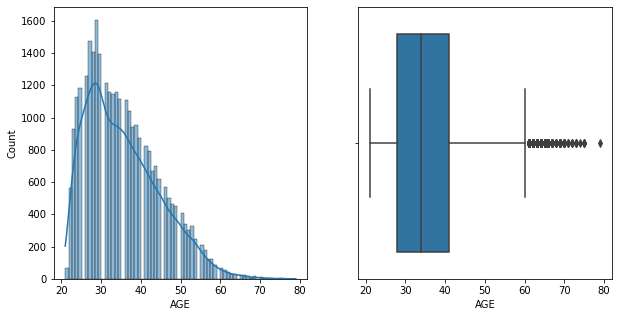

In [17]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(credit.AGE, kde=True, ax=axs[0])
sns.boxplot(x='AGE',data=credit, ax=axs[1])

From the above descriptive statistics and plots, we see that the Age field is right skewed and has outliers

Hence, if we have to impute values, median will be the right statistics to impute

Let us check how many values are missing

In [18]:
credit.isnull().sum()

ID               0
LIMIT_BAL        0
GENDER           0
EDUCATION        0
MARRIAGE         0
AGE             12
PAY_SEP          0
PAY_AUG          0
PAY_JUL          0
PAY_JUN          0
PAY_MAY          0
PAY_APR          0
BILL_AMT_SEP     0
BILL_AMT_AUG     0
BILL_AMT_JUL     0
BILL_AMT_JUN     0
BILL_AMT_MAY     0
BILL_AMT_APR     0
PAY_AMT_SEP      0
PAY_AMT_AUG      0
PAY_AMT_JUL      0
PAY_AMT_JUN      0
PAY_AMT_MAY      0
PAY_AMT_APR      0
DEFAULT          0
dtype: int64

Only Age field has 12 missing values

In [19]:
## Let's extract the rows which have missing values
credit[credit.AGE.isnull()]

ID  LIMIT_BAL GENDER EDUCATION MARRIAGE  AGE PAY_SEP PAY_AUG  \
5          6      50000      1         1        2  NaN       0       0   
21        22     120000      2         2        1  NaN      -1      -1   
31        32      50000      1         2        2  NaN       2       0   
63        64      50000      2         2        1  NaN       0       0   
409      410     280000      1         1        2  NaN       0       0   
430      431      90000      2         2        2  NaN       0       0   
3110    3111     100000      1         2        1  NaN       0       0   
3118    3119      60000      2         2        1  NaN       0       0   
3199    3200     180000      1         2        2  NaN       1      -2   
3216    3217      20000      2         1        2  NaN       2       2   
10705  10706      20000      2         2        2  NaN       0       0   
10716  10717     280000      1         2        2  NaN      -1      -1   

      PAY_JUL PAY_JUN  ... BILL_AMT_JUN BILL_AMT_MAY  BILL_AMT_APR  \
5           0       0  ...        19394        19619         20024   
21         -1      -1  ...            0          632           316   
31          0       0  ...        22734        23217         23680   
63          0      -2  ...            0            0             0   
409         0       0  ...       182672       168399        167983   
430         0       0  ...        74424        76070         77648   
3110        0       0  ...        81209        60720         74375   
3118        0       0  ...        36914        37684         38613   
3199       -2      -2  ...        89384        88315         84320   
3216        2       2  ...        17095        19748         18722   
10705       0       0  ...        11002        11608          9186   
10716       0       0  ...        39607        37542         34812   

       PAY_AMT_SEP  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
5             2500         1815          657         1000         1000   
21             316          316            0          632          316   
31            1718         1500         1000         1000         1000   
63            1000            0            0            0            0   
409          10000         8000         6371         6217         5947   
430           3200         3300         3000         3001         3000   
3110          4000         3000         3004         2278        15000   
3118          2880         2473         1322         1366         1554   
3199          4600         4207         3500         4000         5000   
3216         10000          800            0         3500            0   
10705         1232         1092          500         1000          500   
10716        49349         3045         5028         5034         5024   

       PAY_AMT_APR  DEFAULT  
5              800        0  
21               0        1  
31             716        1  
63               0        1  
409           6288        0  
430           3100        0  
3110          3000        0  
3118          1369        0  
3199           602        1  
3216          1000        1  
10705          500        0  
10716         5002        0  

[12 rows x 25 columns]

Our objective in this problem to predict 'Default'

With current data, lets check if the 'Age' statistics is significantly different for Default=0 and Default=1


<AxesSubplot:xlabel='DEFAULT', ylabel='AGE'>

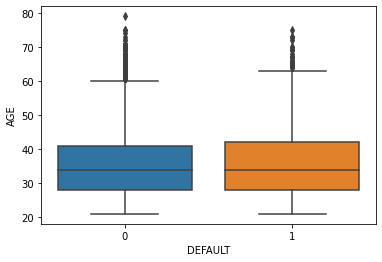

In [20]:
sns.boxplot(x='DEFAULT', y = 'AGE', data=credit)

From the above plot we observe that there is no significant difference. Hence, we can impute the missing values with overall median value rather than picking up separate median values for DEFAULT=0 and DEFAULT=1

In [21]:
credit.AGE = credit.AGE.fillna(credit.AGE.median())
credit[credit.AGE.isnull()]

Empty DataFrame
Columns: [ID, LIMIT_BAL, GENDER, EDUCATION, MARRIAGE, AGE, PAY_SEP, PAY_AUG, PAY_JUL, PAY_JUN, PAY_MAY, PAY_APR, BILL_AMT_SEP, BILL_AMT_AUG, BILL_AMT_JUL, BILL_AMT_JUN, BILL_AMT_MAY, BILL_AMT_APR, PAY_AMT_SEP, PAY_AMT_AUG, PAY_AMT_JUL, PAY_AMT_JUN, PAY_AMT_MAY, PAY_AMT_APR, DEFAULT]
Index: []

[0 rows x 25 columns]

Categorical Fields

In [22]:
credit.GENDER.value_counts()

2    18112
1    11888
Name: GENDER, dtype: int64

In [23]:
credit.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

As per data dictionary there is no mention of Marital Status being 0. Lets see how this field influences the dependent variable 'DEFAULT'

In [24]:
pd.crosstab(credit.DEFAULT, credit.MARRIAGE, margins=True, normalize=True)

MARRIAGE         0         1         2         3     All
DEFAULT                                                 
0         0.001633  0.348433  0.420767  0.007967  0.7788
1         0.000167  0.106867  0.111367  0.002800  0.2212
All       0.001800  0.455300  0.532133  0.010767  1.0000

Only 0.18% (54) of the overall records has a value of 0
If we impute this with mode value of 2, there will be a slight increase in the proportion of level 2
As we have 30000 records in hand out of which only 54 have 0 values, we can go ahead and drop these rows instead of changing the data

In [25]:
credit = credit[credit.MARRIAGE != 0]

In [26]:
credit.shape

(29946, 25)

As we have removed few rows from the dataframe, the index is not continuous

Need to reset the index to get the continuous values

In [27]:
credit.reset_index(drop=True, inplace=True) 

In [28]:
credit.head()

ID  LIMIT_BAL GENDER EDUCATION MARRIAGE   AGE PAY_SEP PAY_AUG PAY_JUL  \
0   1      20000      2         2        1  24.0       2       2      -1   
1   2     120000      2         2        2  26.0      -1       2       0   
2   3      90000      2         2        2  34.0       0       0       0   
3   4      50000      2         2        1  37.0       0       0       0   
4   5      50000      1         2        1  57.0      -1       0      -1   

  PAY_JUN  ... BILL_AMT_JUN BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEP  \
0      -1  ...            0            0             0            0   
1       0  ...         3272         3455          3261            0   
2       0  ...        14331        14948         15549         1518   
3       0  ...        28314        28959         29547         2000   
4       0  ...        20940        19146         19131         2000   

   PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  DEFAULT  
0          689            0            0            0            0        1  
1         1000         1000         1000            0         2000        1  
2         1500         1000         1000         1000         5000        0  
3         2019         1200         1100         1069         1000        0  
4        36681        10000         9000          689          679        0  

[5 rows x 25 columns]

In [29]:
credit.tail()

ID  LIMIT_BAL GENDER EDUCATION MARRIAGE   AGE PAY_SEP PAY_AUG  \
29941  29996     220000      1         3        1  39.0       0       0   
29942  29997     150000      1         3        2  43.0      -1      -1   
29943  29998      30000      1         2        2  37.0       4       3   
29944  29999      80000      1         3        1  41.0       1      -1   
29945  30000      50000      1         2        1  46.0       0       0   

      PAY_JUL PAY_JUN  ... BILL_AMT_JUN BILL_AMT_MAY  BILL_AMT_APR  \
29941       0       0  ...        88004        31237         15980   
29942      -1      -1  ...         8979         5190             0   
29943       2      -1  ...        20878        20582         19357   
29944       0       0  ...        52774        11855         48944   
29945       0       0  ...        36535        32428         15313   

       PAY_AMT_SEP  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
29941         8500        20000         5003         3047         5000   
29942         1837         3526         8998          129            0   
29943            0            0        22000         4200         2000   
29944        85900         3409         1178         1926        52964   
29945         2078         1800         1430         1000         1000   

       PAY_AMT_APR  DEFAULT  
29941         1000        0  
29942            0        0  
29943         3100        1  
29944         1804        1  
29945         1000        1  

[5 rows x 25 columns]

In [30]:
credit.MARRIAGE.value_counts()

2    15964
1    13659
3      323
Name: MARRIAGE, dtype: int64

In [31]:
credit.EDUCATION.value_counts()

2    14024
1    10581
3     4873
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

5 and 6 correspond to 'Unknown'. So we can replace all 6 to 5.
There are only 14 records with 0 value. We can replace even 0 to 'Unknown' category as currently we dont know what it stands for. In future, if data for 'Unknown' Education has to be found, the ones with value 0 will also be included.

In [32]:
credit.EDUCATION.replace(to_replace=6, value=5, inplace=True)

In [33]:
credit.EDUCATION.replace(to_replace=0, value=5, inplace=True)

In [34]:
credit.EDUCATION.value_counts()

2    14024
1    10581
3     4873
5      345
4      123
Name: EDUCATION, dtype: int64

In [35]:
# Define a function to retrieve count of levels within each category
def get_level_counts(i):
    print(credit[i].value_counts())

In [36]:
PAY_X = ['PAY_APR','PAY_MAY','PAY_JUN','PAY_JUL','PAY_AUG','PAY_SEP']

In [37]:
for f in PAY_X:
    get_level_counts(f)

 0    16265
-1     5726
-2     4883
 2     2760
 3      183
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_APR, dtype: int64
 0    16922
-1     5528
-2     4534
 2     2621
 3      177
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_MAY, dtype: int64
 0    16436
-1     5673
-2     4336
 2     3150
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_JUN, dtype: int64
 0    15745
-1     5925
-2     4074
 2     3810
 3      238
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_JUL, dtype: int64
 0    15708
-1     6035
 2     3919
-2     3774
 3      326
 4       98
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_AUG, dtype: int64
 0    14717
-1     5671
 1     3681
-2     2752
 2     2663
 3      322
 4       76
 5       25
 8       19
 6       11
 7        9
Name: PAY_SEP, dtype: int64


In [38]:
credit.DEFAULT.value_counts(normalize=True)

0    0.778568
1    0.221432
Name: DEFAULT, dtype: float64

Lets replace the values of some of the categorical variable with meaningful labels so it eases our EDA process and helps in getting insights.

In [39]:
credit.GENDER.replace(to_replace=1, value='M', inplace=True)
credit.GENDER.replace(to_replace=2, value='F', inplace=True)

In [40]:
credit.EDUCATION.replace(to_replace=1, value='Grad', inplace=True)
credit.EDUCATION.replace(to_replace=2, value='Univ', inplace=True)
credit.EDUCATION.replace(to_replace=3, value='HSchool', inplace=True)
credit.EDUCATION.replace(to_replace=4, value='Others', inplace=True)
credit.EDUCATION.replace(to_replace=5, value='Unknown', inplace=True)

In [41]:
credit.MARRIAGE.replace(to_replace=1,value='Married', inplace=True)
credit.MARRIAGE.replace(to_replace=2,value='Single', inplace=True)
credit.MARRIAGE.replace(to_replace=3,value='Others', inplace=True)

#### Anomalies Check

In [42]:
### Possible case
# Customers who have negative Bill amount in last 3 months, 
# have not defaulted in last 6 months but are still marked as defaulters

credit[(credit.BILL_AMT_JUL < 0) & (credit.BILL_AMT_AUG < 0) & (credit.BILL_AMT_SEP < 0) & # Bill amount is -ve for last 3 months
       (credit.PAY_APR < 1) & (credit.PAY_MAY < 1) & (credit.PAY_JUN < 1) & # Not defaulted for last 6 months
       (credit.PAY_JUL < 1) & (credit.PAY_AUG < 1) & (credit.PAY_SEP < 1) & 
       (credit.DEFAULT == 1)] # marked as defaulters

ID  LIMIT_BAL GENDER EDUCATION MARRIAGE   AGE PAY_SEP PAY_AUG  \
3937    3946     500000      F      Grad   Single  35.0      -2      -2   
6175    6187     200000      M      Grad   Single  33.0      -2      -2   
7152    7165     320000      F      Grad   Single  32.0      -2      -2   
16022  16047      10000      F      Univ   Single  40.0      -2      -2   
17281  17308     360000      F      Univ   Single  36.0      -2      -2   
17797  17826      50000      M      Univ   Single  25.0      -2      -2   
18929  18961     200000      F      Grad   Single  29.0      -2      -2   
20012  20046     230000      F      Grad   Single  37.0      -2      -2   
20119  20154     240000      F      Univ  Married  37.0      -2      -2   
20259  20294     360000      F      Grad  Married  52.0      -2      -2   
22703  22741     190000      F      Univ  Married  33.0      -2      -2   
23607  23649     200000      F      Grad   Single  43.0      -2      -2   
24812  24857     210000      M      Univ   Single  47.0      -2      -2   
25420  25467     360000      F      Univ   Single  28.0      -2      -2   
26465  26514     280000      F      Grad  Married  63.0      -2      -2   
27327  27376     360000      M      Univ  Married  35.0      -2      -2   
27433  27482     160000      M      Univ   Single  57.0      -2      -2   
28615  28667     260000      F      Grad  Married  35.0      -2      -2   
28754  28807     390000      F      Grad   Single  41.0      -2      -2   

      PAY_JUL PAY_JUN  ... BILL_AMT_JUN BILL_AMT_MAY  BILL_AMT_APR  \
3937       -2      -2  ...          -73          -73           -73   
6175       -2      -2  ...          -18          -18           -18   
7152       -2      -2  ...           -1            0          -400   
16022      -2      -1  ...           26          326           -87   
17281      -2      -1  ...          585          139             0   
17797      -2      -2  ...        -2587        -2587         -2587   
18929      -2      -2  ...         -792         -792         69708   
20012      -2      -2  ...          -18          -18           -18   
20119      -2      -2  ...         -150         -150          -150   
20259      -2      -1  ...         1000            0             0   
22703      -2      -2  ...        -5036        -5036         93493   
23607      -2      -2  ...         -109         -109          -109   
24812      -2      -2  ...       -65167         -168          2999   
25420      -2      -2  ...         -307         -307          -307   
26465      -2      -2  ...         -200         -200          -200   
27327      -2      -2  ...           -9         1943          2500   
27433      -2      -2  ...           -1           -1           600   
28615      -2      -2  ...         1599          360           882   
28754      -2      -2  ...          -13          -13           -13   

       PAY_AMT_SEP  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
3937             0            0            0            0            0   
6175             0            0            0            0            0   
7152             0            0            0            1          400   
16022            0            0           30          300         1000   
17281            0          145          744          139            0   
17797            0            0            0            0            0   
18929            0          792            0            0        70500   
20012           18            0            0            0            0   
20119            0            0            0            0            0   
20259            0            0         1003            0            0   
22703            0         1941            0            0        98529   
23607            0            0            0            0            0   
24812            0            0         5530        84332        21500   
25420            0            0            0            0          307  

In [43]:
credit_anom1 = credit[(credit.BILL_AMT_JUL < 0) & (credit.BILL_AMT_AUG < 0) & (credit.BILL_AMT_SEP < 0) & # Bill amount is -ve for last 3 months
       (credit.PAY_APR < 1) & (credit.PAY_MAY < 1) & (credit.PAY_JUN < 1) & # Not defaulted for last 6 months
       (credit.PAY_JUL < 1) & (credit.PAY_AUG < 1) & (credit.PAY_SEP < 1) & 
       (credit.DEFAULT == 1)]

In [44]:
credit_anom1.describe(include='all').T

count unique     top freq      mean      std    min     25%  \
ID              19    NaN     NaN  NaN   20183.9  7532.23   3946   17567   
LIMIT_BAL       19    NaN     NaN  NaN    256842   118886  10000  200000   
GENDER          19      2       F   14       NaN      NaN    NaN     NaN   
EDUCATION       19      2    Grad   10       NaN      NaN    NaN     NaN   
MARRIAGE        19      2  Single   13       NaN      NaN    NaN     NaN   
AGE             19    NaN     NaN  NaN   38.8421   9.8785     25      33   
PAY_SEP         19      1      -2   19       NaN      NaN    NaN     NaN   
PAY_AUG         19      1      -2   19       NaN      NaN    NaN     NaN   
PAY_JUL         19      1      -2   19       NaN      NaN    NaN     NaN   
PAY_JUN         19      2      -2   16       NaN      NaN    NaN     NaN   
PAY_MAY         19      2      -2   15       NaN      NaN    NaN     NaN   
PAY_APR         19      2      -2   14       NaN      NaN    NaN     NaN   
BILL_AMT_SEP    19    NaN     NaN  NaN  -335.316  677.867  -2650  -181.5   
BILL_AMT_AUG    19    NaN     NaN  NaN  -524.105  1278.89  -5174  -181.5   
BILL_AMT_JUL    19    NaN     NaN  NaN  -380.316  810.042  -2650  -181.5   
BILL_AMT_JUN    19    NaN     NaN  NaN  -3751.11  14937.2 -65167  -253.5   
BILL_AMT_MAY    19    NaN     NaN  NaN  -352.842  1385.42  -5036    -184   
BILL_AMT_APR    19    NaN     NaN  NaN   8748.42  26001.5  -2587  -129.5   
PAY_AMT_SEP     19    NaN     NaN  NaN  0.947368  4.12948      0       0   
PAY_AMT_AUG     19    NaN     NaN  NaN   151.474  470.214      0       0   
PAY_AMT_JUL     19    NaN     NaN  NaN   475.263  1308.49      0       0   
PAY_AMT_JUN     19    NaN     NaN  NaN   4583.68  19317.2      0       0   
PAY_AMT_MAY     19    NaN     NaN  NaN   10327.3  27000.7      0       0   
PAY_AMT_APR     19    NaN     NaN  NaN   2272.21  6895.89      0       0   
DEFAULT         19      1       1   19       NaN      NaN    NaN     NaN   

                 50%      75%     max  
ID             20294  25990.5   28807  
LIMIT_BAL     240000   360000  500000  
GENDER           NaN      NaN     NaN  
EDUCATION        NaN      NaN     NaN  
MARRIAGE         NaN      NaN     NaN  
AGE               36       42      63  
PAY_SEP          NaN      NaN     NaN  
PAY_AUG          NaN      NaN     NaN  
PAY_JUL          NaN      NaN     NaN  
PAY_JUN          NaN      NaN     NaN  
PAY_MAY          NaN      NaN     NaN  
PAY_APR          NaN      NaN     NaN  
BILL_AMT_SEP    -109      -11      -1  
BILL_AMT_AUG    -109      -11      -1  
BILL_AMT_JUL     -73     -6.5      -1  
BILL_AMT_JUN     -18       -1    1599  
BILL_AMT_MAY     -18        0    1943  
BILL_AMT_APR     -18      741   93493  
PAY_AMT_SEP        0        0      18  
PAY_AMT_AUG        0        0    1941  
PAY_AMT_JUL        0       15    5530  
PAY_AMT_JUN        0       70   84332  
PAY_AMT_MAY        0      941   98529  
PAY_AMT_APR        0      944   30000  
DEFAULT          NaN      NaN     NaN

From above data we see that there are 19 customers who have a negative bill amount from JUL through SEP, they have never defaulted on repayment in last 6 months but are still marked as defaulters

Lets rectify these records and change them to non-defaulters

In [45]:
# Retrieve the index for the anomaly records 
list_anom1 = credit_anom1.index
list_anom1

Int64Index([ 3937,  6175,  7152, 16022, 17281, 17797, 18929, 20012, 20119,
            20259, 22703, 23607, 24812, 25420, 26465, 27327, 27433, 28615,
            28754],
           dtype='int64')

In [46]:
# Original count of defaults
credit.DEFAULT.value_counts()

0    23315
1     6631
Name: DEFAULT, dtype: int64

In [47]:
# Mark anomaly records as non-defaulters
credit.DEFAULT = np.where(credit.index.isin(list_anom1), 0, credit.DEFAULT)

In [48]:
# 19 records have moved from defaulters to non-defaulters
credit.DEFAULT.value_counts()

0    23334
1     6612
Name: DEFAULT, dtype: int64

There may be additional anomalies in the data which can be verified and treated as above

#### Feature Engineering

From the existing columns, we may be able to derive additional features which may be more relavant considering the objective to be achieved and may give us better insights

Deriving such features from existing data is part of Feature Engineering

In [49]:
# Repayment status columns which have greater value are more prone to become a defaulters
# Let's sum all the Pay status and which in turn help capture the risk of customer getting into default
credit['RISK_VALUE'] = credit['PAY_APR'] + credit['PAY_MAY'] + credit['PAY_JUN'] + credit['PAY_JUL'] + credit['PAY_AUG'] + credit['PAY_SEP']

In [50]:
credit.RISK_VALUE.dtype

dtype('O')

In [51]:
credit.RISK_VALUE.unique()

array([-2, 3, 0, -3, 2, -10, 1, -5, 7, 8, -9, -1, -6, -12, -7, 9, 10, 12,
       -8, 6, 4, 13, 24, 5, -4, 19, 11, 16, 33, 31, 14, 17, 32, 21, 22,
       -11, 15, 20, 27, 25, 18, 36, 23, 30, 29, 28, 26], dtype=object)

In [52]:
credit['RISK_VALUE']= credit['RISK_VALUE'].astype(int)

In [53]:
# Lets find the average bill amount of the customers for last 6 months
credit['AVG_6_MONTHS_BILL'] = (credit.BILL_AMT_APR + credit.BILL_AMT_MAY + credit.BILL_AMT_JUN + credit.BILL_AMT_JUL + credit.BILL_AMT_AUG + credit.BILL_AMT_SEP)/6

In [54]:
# Lets find the average amount paid by the customers for last 6 months
credit['AVG_6_MONTHS_PAY'] = (credit.PAY_AMT_APR + credit.PAY_AMT_MAY + credit.PAY_AMT_JUN + credit.PAY_AMT_JUL + credit.PAY_AMT_AUG + credit.PAY_AMT_SEP)/6

Before we proceed with Data Visualization lets check our data again

In [55]:
credit.shape

(29946, 28)

In [56]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29946 entries, 0 to 29945
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 29946 non-null  int64  
 1   LIMIT_BAL          29946 non-null  int64  
 2   GENDER             29946 non-null  object 
 3   EDUCATION          29946 non-null  object 
 4   MARRIAGE           29946 non-null  object 
 5   AGE                29946 non-null  float64
 6   PAY_SEP            29946 non-null  object 
 7   PAY_AUG            29946 non-null  object 
 8   PAY_JUL            29946 non-null  object 
 9   PAY_JUN            29946 non-null  object 
 10  PAY_MAY            29946 non-null  object 
 11  PAY_APR            29946 non-null  object 
 12  BILL_AMT_SEP       29946 non-null  int64  
 13  BILL_AMT_AUG       29946 non-null  int64  
 14  BILL_AMT_JUL       29946 non-null  int64  
 15  BILL_AMT_JUN       29946 non-null  int64  
 16  BILL_AMT_MAY       299

In [57]:
credit.describe(include='all').T

count unique     top   freq     mean      std      min  \
ID                 29946    NaN     NaN    NaN  14999.1  8659.57        1   
LIMIT_BAL          29946    NaN     NaN    NaN   167547   129808    10000   
GENDER             29946      2       F  18072      NaN      NaN      NaN   
EDUCATION          29946      5    Univ  14024      NaN      NaN      NaN   
MARRIAGE           29946      3  Single  15964      NaN      NaN      NaN   
AGE                29946    NaN     NaN    NaN  35.4813  9.21739       21   
PAY_SEP            29946     11       0  14717      NaN      NaN      NaN   
PAY_AUG            29946     11       0  15708      NaN      NaN      NaN   
PAY_JUL            29946     11       0  15745      NaN      NaN      NaN   
PAY_JUN            29946     11       0  16436      NaN      NaN      NaN   
PAY_MAY            29946     10       0  16922      NaN      NaN      NaN   
PAY_APR            29946     10       0  16265      NaN      NaN      NaN   
BILL_AMT_SEP       29946    NaN     NaN    NaN  51278.9  73682.9  -165580   
BILL_AMT_AUG       29946    NaN     NaN    NaN  49224.5  71219.3   -69777   
BILL_AMT_JUL       29946    NaN     NaN    NaN  47063.2  69393.2  -157264   
BILL_AMT_JUN       29946    NaN     NaN    NaN  43306.7  64374.9  -170000   
BILL_AMT_MAY       29946    NaN     NaN    NaN  40352.1  60836.1   -81334   
BILL_AMT_APR       29946    NaN     NaN    NaN  38911.5  59592.2  -339603   
PAY_AMT_SEP        29946    NaN     NaN    NaN  5659.74  16552.6        0   
PAY_AMT_AUG        29946    NaN     NaN    NaN  5926.82  23060.2        0   
PAY_AMT_JUL        29946    NaN     NaN    NaN  5227.84  17618.4        0   
PAY_AMT_JUN        29946    NaN     NaN    NaN  4829.61  15677.8        0   
PAY_AMT_MAY        29946    NaN     NaN    NaN  4804.21  15290.7        0   
PAY_AMT_APR        29946    NaN     NaN    NaN  5220.87  17791.4        0   
DEFAULT            29946      2       0  23334      NaN      NaN      NaN   
RISK_VALUE         29946    NaN     NaN    NaN  -1.0934  5.89127      -12   
AVG_6_MONTHS_BILL  29946    NaN     NaN    NaN  45022.8  63301.4 -56043.2   
AVG_6_MONTHS_PAY   29946    NaN     NaN    NaN  5278.18  10143.9        0   

                       25%      50%      75%          max  
ID                 7499.25  14997.5  22495.8        30000  
LIMIT_BAL            50000   140000   240000        1e+06  
GENDER                 NaN      NaN      NaN          NaN  
EDUCATION              NaN      NaN      NaN          NaN  
MARRIAGE               NaN      NaN      NaN          NaN  
AGE                     28       34       41           79  
PAY_SEP                NaN      NaN      NaN          NaN  
PAY_AUG                NaN      NaN      NaN          NaN  
PAY_JUL                NaN      NaN      NaN          NaN  
PAY_JUN                NaN      NaN      NaN          NaN  
PAY_MAY                NaN      NaN      NaN          NaN  
PAY_APR                NaN      NaN      NaN          NaN  
BILL_AMT_SEP       3570.25    22400    67263       964511  
BILL_AMT_AUG       2988.25    21221    64108       983931  
BILL_AMT_JUL        2684.5    20108  60240.8  1.66409e+06  
BILL_AMT_JUN          2335    19066  54601.8       891586  
BILL_AMT_MAY       1770.25    18121  50244.8       927171  
BILL_AMT_APR          1261  17098.5  49248.5       961664  
PAY_AMT_SEP           1000     2100     5007       873552  
PAY_AMT_AUG            836     2010     5000  1.68426e+06  
PAY_AMT_JUL            390     1800   4511.5       896040  
PAY_AMT_JUN            298     1500     4015       621000  
PAY_AMT_MAY         255.25     1500  4040.75       426529  
PAY_AMT_APR            122     1500     4000       528666  
DEFAULT                NaN      NaN      NaN          NaN  
RISK_VALUE              -5        0        0           36  
AVG_6_MONTHS_BILL  4800.42  21073.2  57178.2       877314  
AVG_6_MONTHS_PAY   1115.88  2399.67  5584.92       627344

### Assumptions to be clarified from data using EDA:

1.	Are customers with a higher ‘LIMIT_BAL’ tending towards non credibility? They have a higher credit limit and are spending accordingly. However, when it comes to repayment maybe they are not able to pay back
2.	Are customers with lower education levels, earning less and not able to pay back the bill and hence tending towards default/non-credibility
3.	Are young customers taking undue advantage of the credit limit, spending lavishly but not paying back
4.	Are married customers becoming non credible due to increased family responsibility.


#### Data Visualization

Univariate Analysis

In [58]:
credit.BILL_AMT_AUG.describe()

count     29946.000000
mean      49224.542744
std       71219.298988
min      -69777.000000
25%        2988.250000
50%       21221.000000
75%       64108.000000
max      983931.000000
Name: BILL_AMT_AUG, dtype: float64

<AxesSubplot:xlabel='BILL_AMT_AUG'>

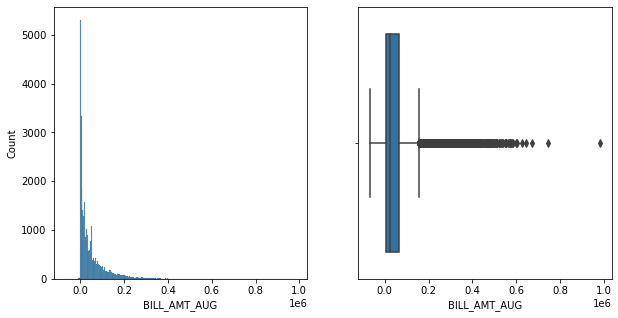

In [59]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(credit.BILL_AMT_AUG, kde=False, ax=axs[0]) 
sns.boxplot(x= 'BILL_AMT_AUG', data=credit, ax=axs[1]) 

In [60]:
credit.PAY_AMT_SEP.describe()

count     29946.000000
mean       5659.736826
std       16552.642231
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5007.000000
max      873552.000000
Name: PAY_AMT_SEP, dtype: float64

<AxesSubplot:xlabel='PAY_AMT_SEP'>

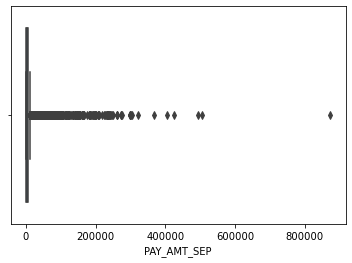

In [61]:
sns.boxplot(x= 'PAY_AMT_SEP', data=credit) 

Amount fields are highly skewed with many outliers

In [62]:
credit_cat = credit.select_dtypes('object')

In [63]:
credit_cat.describe(include='all')

GENDER EDUCATION MARRIAGE  PAY_SEP  PAY_AUG  PAY_JUL  PAY_JUN  PAY_MAY  \
count   29946     29946    29946    29946    29946    29946    29946    29946   
unique      2         5        3       11       11       11       11       10   
top         F      Univ   Single        0        0        0        0        0   
freq    18072     14024    15964    14717    15708    15745    16436    16922   

        PAY_APR  DEFAULT  
count     29946    29946  
unique       10        2  
top           0        0  
freq      16265    23334

#### Insights:

The dataset has more female customers

Majority of the customers are Single

In PAY_X fields we observe there are only 10 levels in PAY_APR and PAY_MAY. However, the number of levels increase to 11 from JUN onwards. Also, in all months we see maximum number of customers with '0' repayment status which indicates that most of the customers are using revolving credit

'PAY_X' field provide information on repayment status.

Lets consider that:
- If customer does not may for upto 3 months (1,2,3) he/she is in delinquency state and beyond that he/she is considered as defaulter

Lets compare the delinquency and default status of the customers across months to see the trend

(0.0, 4000.0)

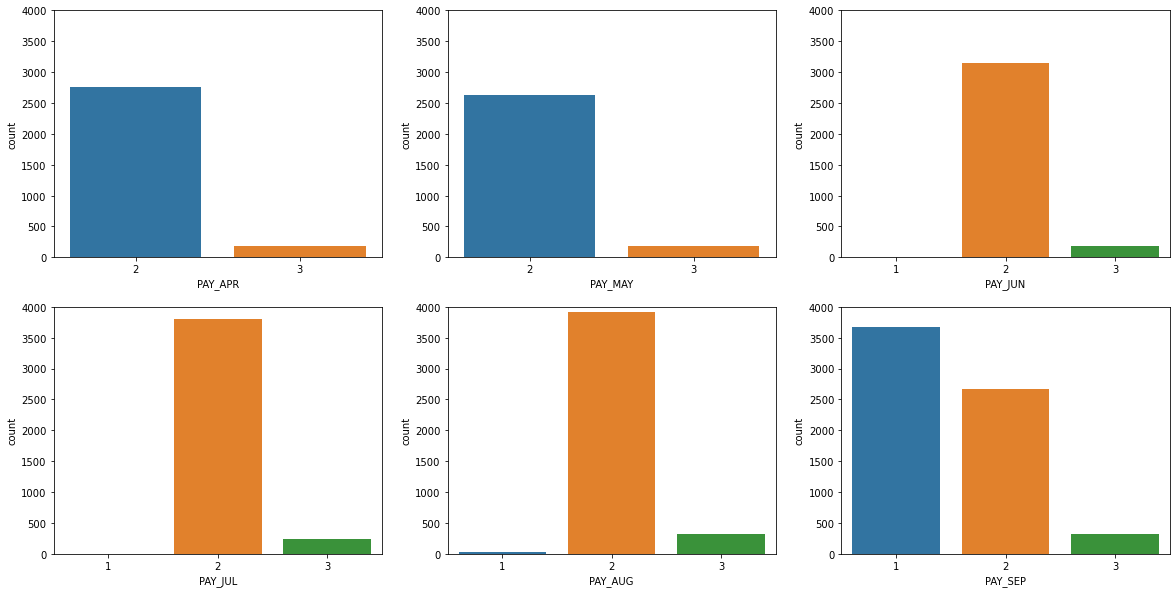

In [64]:
fig_dims = (20, 10) 
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims) 
sns.countplot(x="PAY_APR", data=credit, order=credit.PAY_APR.value_counts().sort_index().iloc[3:5].index, 
              ax=axs[0][0]).set_ylim(0,4000)
sns.countplot(x="PAY_MAY", data=credit, order=credit.PAY_MAY.value_counts().sort_index().iloc[3:5].index, 
              ax=axs[0][1]).set_ylim(0,4000)
sns.countplot(x="PAY_JUN", data=credit, order=credit.PAY_JUN.value_counts().sort_index().iloc[3:6].index, 
              ax=axs[0][2]).set_ylim(0,4000)
sns.countplot(x="PAY_JUL", data=credit, order=credit.PAY_JUL.value_counts().sort_index().iloc[3:6].index, 
              ax=axs[1][0]).set_ylim(0,4000)
sns.countplot(x="PAY_AUG", data=credit, order=credit.PAY_AUG.value_counts().sort_index().iloc[3:6].index, 
              ax=axs[1][1]).set_ylim(0,4000)
sns.countplot(x="PAY_SEP", data=credit, order=credit.PAY_SEP.value_counts().sort_index().iloc[3:6].index, 
              ax=axs[1][2]).set_ylim(0,4000)

#### Insights

In Apr and May there are no customers with delinquency of 1 month. We start seeing increase in this number from Jun through Sep, Sep has reached its highest value of 3500+

Delinquency of 2 months shows a continuous increase from May through Aug. However, in Sep this has reduced and seems like few  customers have started paying the bills as shift of numbers is not from 2 to 3

Delinquency of 3 months has not increased much from Apr to Sep and is within 500


(0.0, 100.0)

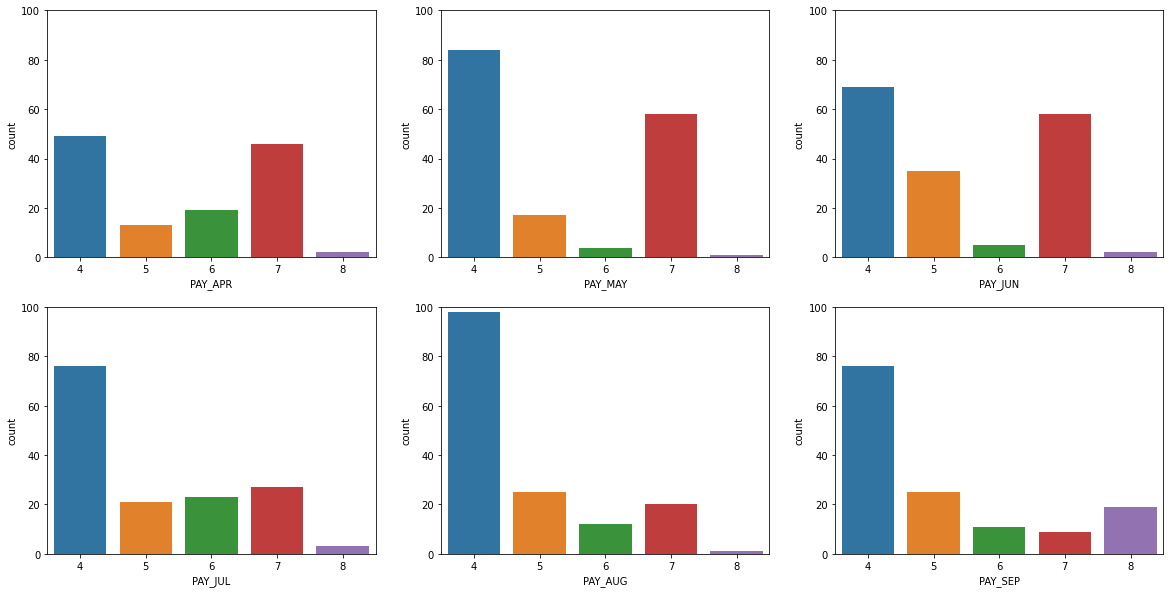

In [65]:
fig_dims = (20, 10) 
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims) 
sns.countplot(x="PAY_APR", data=credit, order=credit.PAY_APR.value_counts().sort_index().iloc[5:10].index, 
              ax=axs[0][0]).set_ylim(0,100)
sns.countplot(x="PAY_MAY", data=credit, order=credit.PAY_MAY.value_counts().sort_index().iloc[5:10].index, 
              ax=axs[0][1]).set_ylim(0,100)
sns.countplot(x="PAY_JUN", data=credit, order=credit.PAY_JUN.value_counts().sort_index().iloc[6:11].index, 
              ax=axs[0][2]).set_ylim(0,100)
sns.countplot(x="PAY_JUL", data=credit, order=credit.PAY_JUL.value_counts().sort_index().iloc[6:11].index, 
              ax=axs[1][0]).set_ylim(0,100)
sns.countplot(x="PAY_AUG", data=credit, order=credit.PAY_AUG.value_counts().sort_index().iloc[6:11].index, 
              ax=axs[1][1]).set_ylim(0,100)
sns.countplot(x="PAY_SEP", data=credit, order=credit.PAY_SEP.value_counts().sort_index().iloc[6:11].index, 
              ax=axs[1][2]).set_ylim(0,100)

#### Insights

Defaulters corresponding to 4 months have increased in May. In Jun there is a decrease, but seems like these customers have contributed to 5 month defaulters. Number of 4 months defaulters further increased in Jul and Aug. However, there seems to be some improvemnt in Sep.

Defaulters for 7 months seem to be coming under control as the numbers have decreased significantly. However, there seems to be slight increase in 8 months defaulters in Sep

Bivariate Analysis

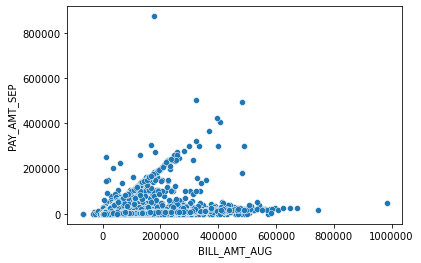

In [66]:
sns.scatterplot(x='BILL_AMT_AUG', y='PAY_AMT_SEP', data=credit)
plt.ticklabel_format(style='plain', axis='x')

In [67]:
sns.scatterplot(x='BILL_AMT_JUL', y='PAY_AMT_AUG', data=credit)

<AxesSubplot:xlabel='BILL_AMT_JUL', ylabel='PAY_AMT_AUG'>

#### Insights:

From above plots we see that as the bill amount increases, there are some points where pay amount also increases porpotionally.These are customers who are paying on time. 

However, few points below it indicate partial payment instead of full payment. 

The points corresonding to the 0 (y value) are the ones not paying the bills

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='BILL_AMT_SEP'>

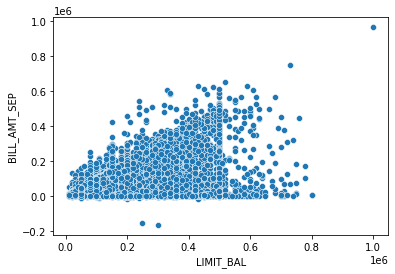

In [68]:
sns.scatterplot(x='LIMIT_BAL', y='BILL_AMT_SEP', data=credit)

#### Insights:

From the above plot we see that not many customers are utilizing the credit beyond the specified limit. There are many customers with 0 bill amount but having a Limit_Bal upto 800000


In [69]:
credit_num = credit.select_dtypes(['float64', 'int64','int32'])
credit_num = credit_num.drop('ID', axis=1)

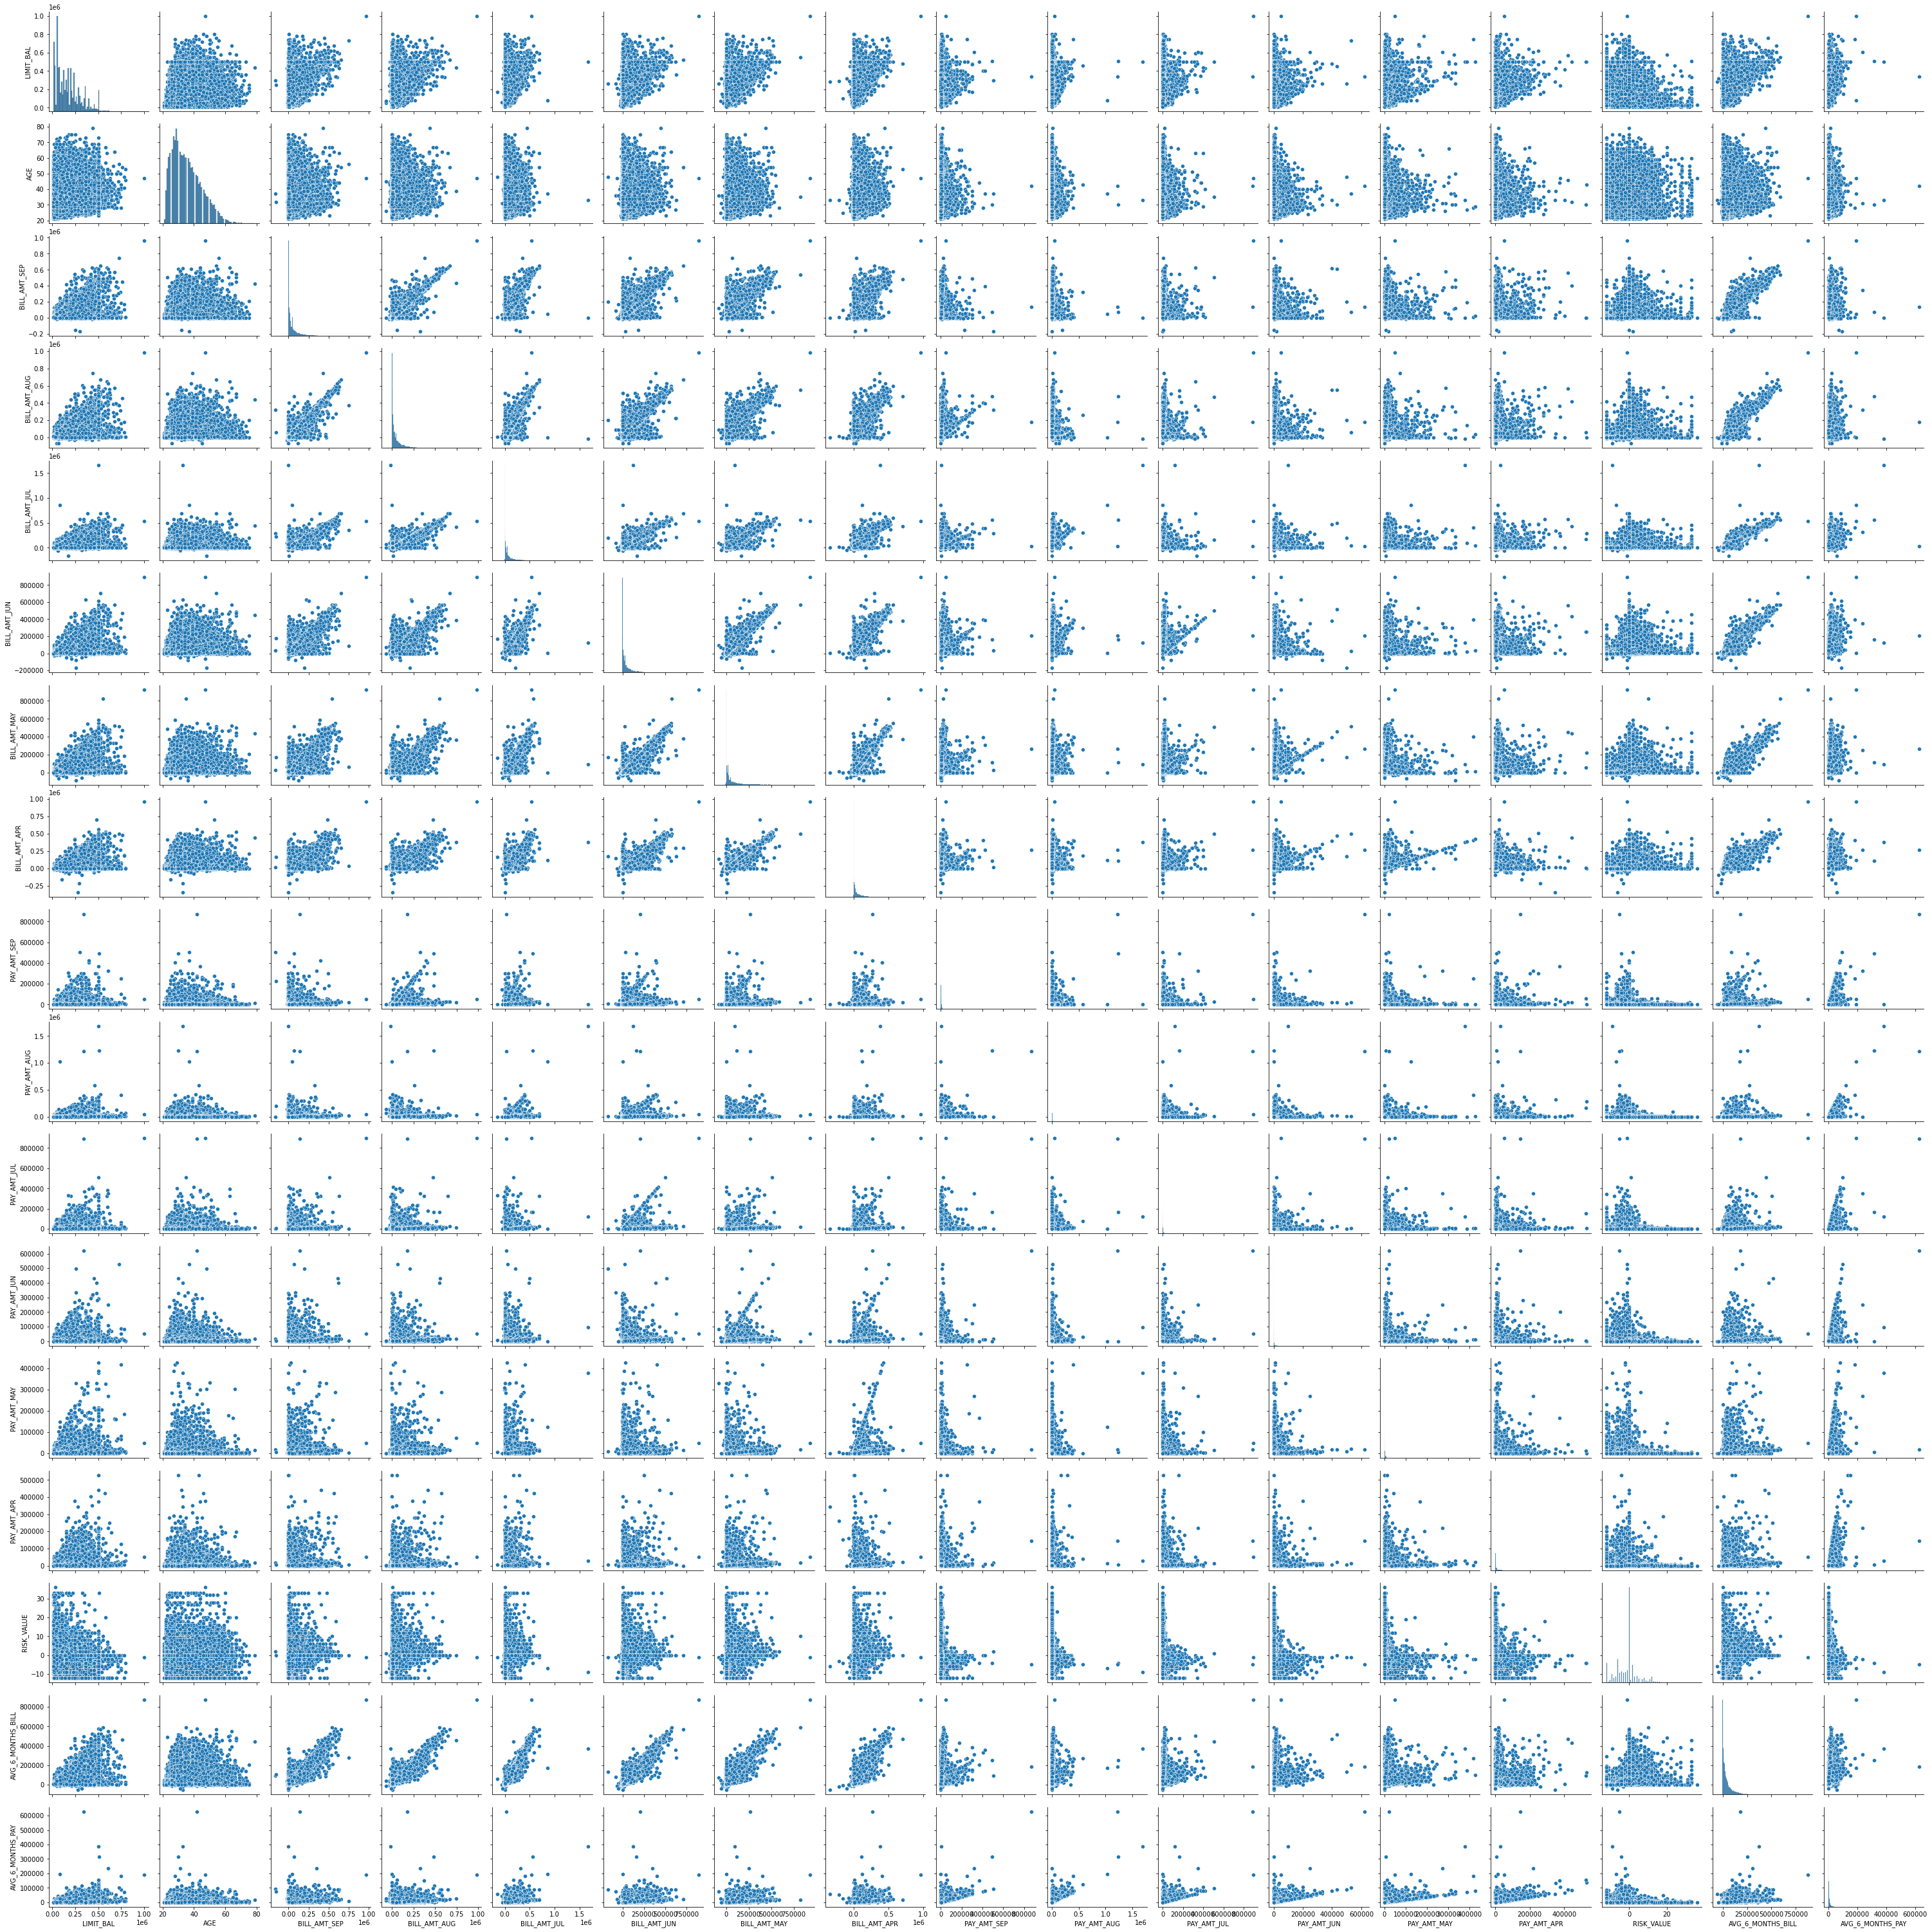

In [70]:
sns.pairplot(credit_num)

In [71]:
corr = credit_num.corr()
round(corr,2)

LIMIT_BAL   AGE  BILL_AMT_SEP  BILL_AMT_AUG  BILL_AMT_JUL  \
LIMIT_BAL               1.00  0.14          0.29          0.28          0.28   
AGE                     0.14  1.00          0.06          0.05          0.05   
BILL_AMT_SEP            0.29  0.06          1.00          0.95          0.89   
BILL_AMT_AUG            0.28  0.05          0.95          1.00          0.93   
BILL_AMT_JUL            0.28  0.05          0.89          0.93          1.00   
BILL_AMT_JUN            0.29  0.05          0.86          0.89          0.92   
BILL_AMT_MAY            0.30  0.05          0.83          0.86          0.88   
BILL_AMT_APR            0.29  0.05          0.80          0.83          0.85   
PAY_AMT_SEP             0.20  0.03          0.14          0.28          0.24   
PAY_AMT_AUG             0.18  0.02          0.10          0.10          0.32   
PAY_AMT_JUL             0.21  0.03          0.16          0.15          0.13   
PAY_AMT_JUN             0.20  0.02          0.16          0.15          0.14   
PAY_AMT_MAY             0.22  0.02          0.17          0.16          0.18   
PAY_AMT_APR             0.22  0.02          0.18          0.17          0.18   
RISK_VALUE             -0.32 -0.06          0.25          0.27          0.27   
AVG_6_MONTHS_BILL       0.30  0.06          0.94          0.96          0.96   
AVG_6_MONTHS_PAY        0.35  0.04          0.26          0.29          0.36   

                   BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEP  \
LIMIT_BAL                  0.29          0.30          0.29         0.20   
AGE                        0.05          0.05          0.05         0.03   
BILL_AMT_SEP               0.86          0.83          0.80         0.14   
BILL_AMT_AUG               0.89          0.86          0.83         0.28   
BILL_AMT_JUL               0.92          0.88          0.85         0.24   
BILL_AMT_JUN               1.00          0.94          0.90         0.23   
BILL_AMT_MAY               0.94          1.00          0.95         0.22   
BILL_AMT_APR               0.90          0.95          1.00         0.20   
PAY_AMT_SEP                0.23          0.22          0.20         1.00   
PAY_AMT_AUG                0.21          0.18          0.17         0.29   
PAY_AMT_JUL                0.30          0.25          0.23         0.25   
PAY_AMT_JUN                0.13          0.29          0.25         0.20   
PAY_AMT_MAY                0.16          0.14          0.31         0.15   
PAY_AMT_APR                0.18          0.16          0.12         0.19   
RISK_VALUE                 0.28          0.28          0.28        -0.03   
AVG_6_MONTHS_BILL          0.96          0.95          0.93         0.23   
AVG_6_MONTHS_PAY           0.35          0.36          0.36         0.60   

                   PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
LIMIT_BAL                 0.18         0.21         0.20         0.22   
AGE                       0.02         0.03         0.02         0.02   
BILL_AMT_SEP              0.10         0.16         0.16         0.17   
BILL_AMT_AUG              0.10         0.15         0.15         0.16   
BILL_AMT_JUL              0.32         0.13         0.14         0.18   
BILL_AMT_JUN              0.21         0.30         0.13         0.16   
BILL_AMT_MAY              0.18         0.25         0.29         0.14   
BILL_AMT_APR              0.17         0.23         0.25         0.31   
PAY_AMT_SEP               0.29         0.25         0.20         0.15   
PAY_AMT_AUG               1.00         0.24         0.18         0.18   
PAY_AMT_JUL               0.24         1.00         0.22         0.16   
PAY_AMT_JUN               0.18         0.22         1.00         0.15   
PAY_AMT_MAY               0.18         0.16         0.15         1.00   
PAY_AMT_APR               0.16         0.16         0.16         0.15   
RISK_VALUE               -0.04        -0.05        -0.05        -0.05   
AVG_6_MONTHS_BILL         0.19         0.

In [72]:
fig_dims = (17, 8)
fig = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(round(corr,2), annot=True, mask=mask)

<AxesSubplot:>

#### Insights
We observe bill amounts are highly correlated with each other. Especially the consecutive months bill amount have a correlation of more than 0.9

There is a weak correlation between the bill amount of a month and the pay amount of consecutive month (around 0.3) indicating that most of the time payments are not made according to bill amount

RISK_VALUE shows negative correlation with LIMIT_BAL indicating that higher risk may be associated with customers who have a lower credit balance

<AxesSubplot:xlabel='DEFAULT', ylabel='AGE'>

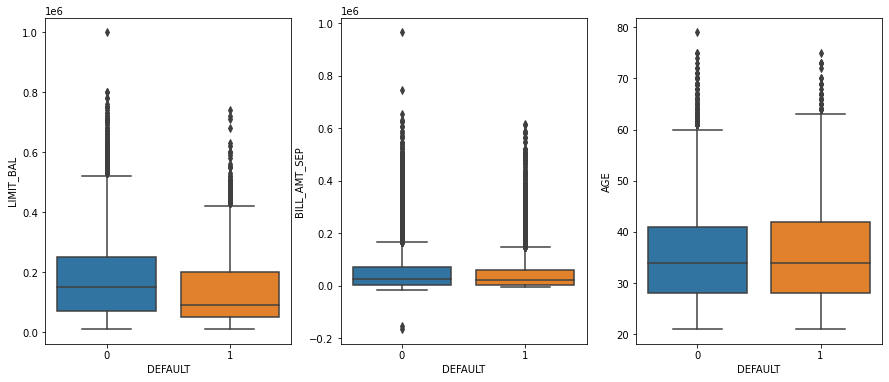

In [73]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15,6))
sns.boxplot(x='DEFAULT', y='LIMIT_BAL', data=credit, ax=axs[0])
sns.boxplot(x='DEFAULT', y='BILL_AMT_SEP', data=credit, ax=axs[1])
sns.boxplot(x='DEFAULT', y='AGE', data=credit, ax=axs[2])

#### Insights

We see that median value of the LIMIT_BAL for defaulters is less compared to that of non-defaulters

There is no difference in median age or median Sep bill amount between defaulters and non defaulters

In [74]:
fig = plt.subplots(figsize=(15,6))
sns.boxplot(x='PAY_SEP', y='AVG_6_MONTHS_BILL', data=credit)

<AxesSubplot:xlabel='PAY_SEP', ylabel='AVG_6_MONTHS_BILL'>

### Insights:

Median of 6 month average bill is higher for customers who have defaulted for 6 to 7 months

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

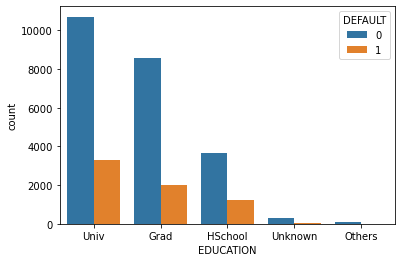

In [75]:
sns.countplot(x='EDUCATION', hue='DEFAULT', data=credit)

In [76]:
pd.crosstab(credit.DEFAULT, credit.EDUCATION, margins=True,normalize=True)

EDUCATION      Grad   HSchool    Others      Univ   Unknown       All
DEFAULT                                                              
0          0.285681  0.121552  0.003874  0.357443  0.010653  0.779203
1          0.067655  0.041174  0.000234  0.110866  0.000868  0.220797
All        0.353336  0.162726  0.004107  0.468310  0.011521  1.000000

#### Insights

Out of 22% of customers who have defaulted,  11% are University Graduates

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

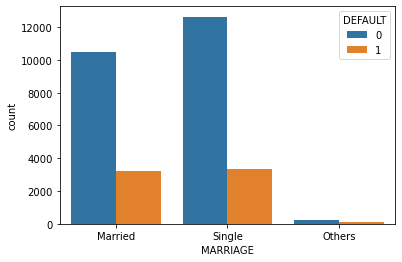

In [77]:
sns.countplot(x='MARRIAGE', hue='DEFAULT', data=credit)

In [78]:
pd.crosstab(credit.MARRIAGE, credit.DEFAULT, margins=True, normalize=True)

DEFAULT          0         1       All
MARRIAGE                              
Married   0.349262  0.106859  0.456121
Others    0.007981  0.002805  0.010786
Single    0.421960  0.111133  0.533093
All       0.779203  0.220797  1.000000

#### Insights

There is no major difference between default count of Single and Married customers

In [79]:
pd.crosstab(credit.GENDER, credit.PAY_SEP, margins=True, normalize=True)

PAY_SEP        -2        -1         0         1         2         3         4  \
GENDER                                                                          
F        0.062880  0.118280  0.290256  0.073132  0.051559  0.005443  0.001069   
M        0.029019  0.071095  0.201195  0.049790  0.037367  0.005310  0.001469   
All      0.091899  0.189374  0.491451  0.122921  0.088927  0.010753  0.002538   

PAY_SEP         5         6         7         8       All  
GENDER                                                     
F        0.000267  0.000167  0.000134  0.000301  0.603486  
M        0.000568  0.000200  0.000167  0.000334  0.396514  
All      0.000835  0.000367  0.000301  0.000634  1.000000

#### Insights

9% of the customers are not using the credit facility

18.93% customers are duly paying thier bills. Out of this 11.8% are female customers while 7% are male customers.

If we observe the delinquency status (default by 1 or 2 months), percentage of female customers is comparatively higher

If we observe defaults for more than 6 months there is no major difference in percentage between the male and female customers

In [80]:
temp_df = pd.DataFrame(credit.groupby('PAY_SEP')['BILL_AMT_AUG'].sum())
temp_df.rename(columns={'BILL_AMT_AUG': 'TOTAL_BILL_AMT_AUG'}, inplace=True)
temp_df['TOTAL_PAY_AMT_SEP'] = credit.groupby('PAY_SEP')['PAY_AMT_SEP'].sum()
temp_df['NUMBER of CUSTOMERS'] = credit.groupby('PAY_SEP')['PAY_SEP'].agg('count')
temp_df['DUE_AMT'] = temp_df['TOTAL_BILL_AMT_AUG'] - temp_df['TOTAL_PAY_AMT_SEP']
temp_df['DUE_AMT/CUSTOMER'] = round(temp_df['DUE_AMT']/temp_df['NUMBER of CUSTOMERS'],2)
temp_df.head(12)

TOTAL_BILL_AMT_AUG  TOTAL_PAY_AMT_SEP  NUMBER of CUSTOMERS  \
PAY_SEP                                                               
-2                 23645653           17756510                 2752   
-1                 62693629           42014038                 5671   
 0               1093268593           89419238                14717   
 1                 99492711           10413447                 3681   
 2                171547233            9502335                 2663   
 3                 11944780             320181                  322   
 4                  5063590              48374                   76   
 5                  2059031              12356                   25   
 6                   921721                  0                   11   
 7                  1311410                  0                    9   
 8                  2129806                  0                   19   

            DUE_AMT  DUE_AMT/CUSTOMER  
PAY_SEP                                
-2          5889143           2139.95  
-1         20679591           3646.55  
 0       1003849355          68210.19  
 1         89079264          24199.75  
 2        162044898          60850.51  
 3         11624599          36101.24  
 4          5015216          65989.68  
 5          2046675          81867.00  
 6           921721          83792.82  
 7          1311410         145712.22  
 8          2129806         112095.05

### Insight

For the month of September:

If there are 2752 customers with status as -2 (inactive or have no consumption), need to check on the amount value that is coming up from the data. Maybe these are amounts being carried forward since the account is inactive. Since the number of records is high need to consult business before taking any action on this data.

Also, there are 5671 customers with status of -1. Seems like these are customers who are paying the bills but may not be paying the entire bill amount as due amount/customer is comparatively on lower side.

We see that number of customers with repayment status as 0 (making use revolving credit) is highest and even the due amount is highest for this group. However, if we consider due amount/customer it is not very high.

The number of customers who have defaulted for more than 3 months is low (PAY_SEP>3) but the due amount/customer is higher which is a concern.

Multivariate Analysis

<AxesSubplot:xlabel='BILL_AMT_AUG', ylabel='PAY_AMT_SEP'>

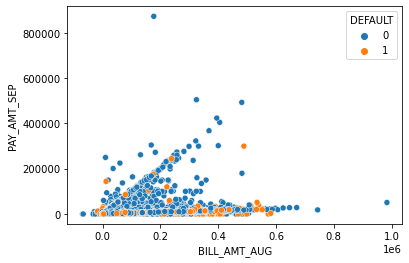

In [81]:
sns.scatterplot(x='BILL_AMT_AUG', y='PAY_AMT_SEP', hue='DEFAULT', data=credit)

### Insight
We see more number of defaulters with higher bill amounts ranging between 300000 through 600000

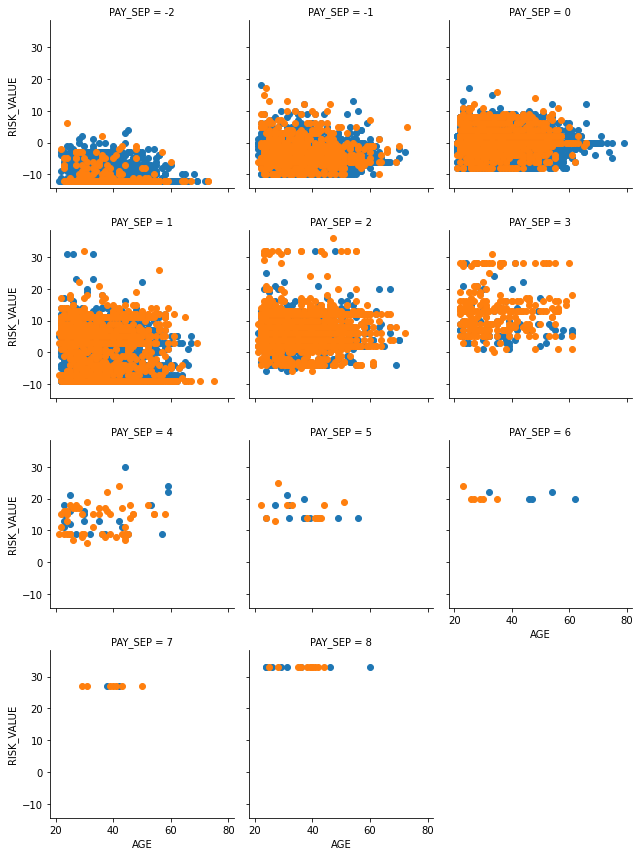

In [82]:
g = sns.FacetGrid(credit, col="PAY_SEP", hue='DEFAULT',col_wrap=3, height=3)
g = g.map(plt.scatter, "AGE", 'RISK_VALUE')

#### Insights

Risk is higher for customers who have not done repayment for 2 months or more. For repayment status of -2, -1 and 0 we see the risk is quite low

From the plot we see that there are not many defaulters with age > 60 years. Major chunk of defaulters are young

Risk is also not high for customer with age > 60

As we are checking the repayment status of Sep, there seems to be very few customers with high risk and not done repayment for more than 5 months

Most of the high risk customers are defaulters

#### Summary observations from EDA:

• Majority of the customers are female customers and also most of the customers are Single.

• There are customers who are making advance payments which is indicated by the negative value in the Bill Amount field indicating these are credible customers.

• Most of the defaulters are of < 60 years of age

• Clarification to the assumptions or intuitions we had before EDA:

    • Are customers with a higher ‘LIMIT_BAL’ tending towards non credibility? They have a higher credit limit and are spending accordingly. However, when it comes to repayment maybe they are not able to pay back 
    -> RISK_VALUE shows negative correlation with LIMIT_BAL indicating that higher risk may be associated with customers who have a lower credit balance
    -> We see that median value of the LIMIT_BAL for defaulters is less compared to that of non-defaulters
    
    • Are customers with lower education levels, earning less and not able to pay back the bill and hence tending towards default/non-credibility
    -> Out of 22% of customers who have defaulted, 11% are University Graduates. So our assumption of lower educated customers being a problem is not very true
    
    • Are young customers taking undue advantage of the credit limit, spending lavishly but not paying back
    -> There is no difference in median age between defaulters and non-defaulters
    
    • Are married customers becoming non credible due to increased responsibility of family.
    -> There is no major difference between default count of Single and Married customers
    
• In all months we see maximum number of customers with '0' repayment status which indicates that most of the customers are using revolving credit. Also, for the month of Sep we observed that even the due amount is highest for this group. This is the group of customers where majority of the company’s amount has to be recovered. We also observe that not many customers are utilizing the credit beyond the specified limit hence not getting called out.

    -> Action: For the customers who are using revolving credit and have a bill amount tending to breach the credit limit over past 3 months, company can cross sell and provide options of fixed repayment or EMI or loan bat competitive interest rate so that the customer does not tend towards default status
    
• As on Sep around 9% of the customers are not using the credit facility.

    -> Action: Potential customers who can be pitched in with offers for credit card sale
    
• The number of customers who have defaulted for more than 3 months is low but the due amount/customer is higher which is a concern.
    
    -> Action: Recovery measures to be initiated for these customers

### Data Preparation

As the numeric fields in this data have many outliers and are highly skewed, we need to choose a machine learning technique that is not very sensitive to the outliers.

In case we have to choose technique which expects data to be normal, we can apply transformation techniques to reduce the skewness. Note: Use one transformation technique for all numeric field.

Further, outliers can be capped to a value such that there is no major change in the data distribution (Check the data summary before and after the outlier treatment)

Scaling may be required if a distance based or weight based technique is chosen. Z Score or Standard Scalar method is the most commonly used method for scaling

The categorical levels in the current case study are not many. Hence, One Hot Encoding can be applied for the categorical fields.

### Summary

#### EDA helps in getting insights from Data :

Quality : We found features that had missing values, bad data which had to be cleaned. We also found anomalies in the data based on the business context which had to be treated.

Quantum of Data: We know about how many valid observations and relevant features are available to proceed with the prediction. We also understand that there is a data imbalance (only 22% of the observations correspond to defaulters). This will help in understanding some of the model evaluation parameters better and give us an idea on how the model performance can be improved further.

Several statistical measurements and distributions corresponding to categorical and numeric features. This can be useful is choosing an apporpriate technique to build the classification model which is the next step.

Frequency and distribution of the features. This will help us validate the assumptions that are made before implementing a technique.

Relevance of data w.r.t the objective: Univariate, Bivariate, Multivariate analysis helps us understand if the features will indeed help in classifying the defaulters

A thorough EDA helps to avoid any bad data leakage to further steps. It also, helps us understand the current business situation and already gives us an insight on several parameters. It helps us be more confident in taking decisions while we move further implementing the several predictive modelling and machine learning techniques